In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

In [4]:
iris=load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [10]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [15]:
df['flower']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.drop(['sepal length (cm)','sepal width (cm)','flower'],axis='columns',inplace=True)

In [17]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [19]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3)
y_predict=kmeans.fit_predict(df[['petal length (cm)','petal width (cm)']])


In [21]:
df['cluster']=y_predict

In [22]:
df.cluster.unique()

array([1, 2, 0])

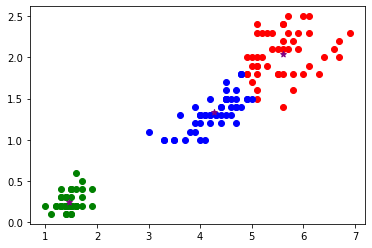

In [28]:
df0=df[df.cluster==0]
df1=df[df.cluster==1]
df2=df[df.cluster==2]
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*')

In [29]:
sse=[]
k_rang=range(1,10)
for k in k_rang:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['petal length (cm)','petal width (cm)']])
    sse.append(kmeans.inertia_)

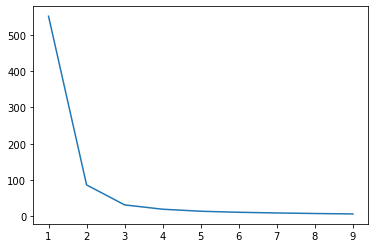

In [30]:
plt.plot(k_rang,sse)